## KNN Approach



### Setup

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets

from pathlib import Path
import os

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler


from pyMLaux import plot_history, evaluate_classification_result,plot_2d_prediction


2024-05-06 21:42:22.969139: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-06 21:42:23.003025: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-06 21:42:23.003052: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-06 21:42:23.003971: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-06 21:42:23.010332: I tensorflow/core/platform/cpu_feature_guar

In [2]:
# read dynamic path
base_dir = Path(os.getcwd()) / "implementation"
data_dir = base_dir / "data/source/"
result_dir = base_dir / "data/results/"

### load & prepare dataset

the following code needs to be adapted for each protein-ligand complex individually

In [3]:
nn_data_raw = pd.read_csv(data_dir/"COX1/COX1.csv")

nn_data_raw

,INDEX,NAME,Hydrogen_Bond:ALA527A,Halogen_Bond:ASP110A,Hydrophobic_Interaction:ILE345A,Hydrophobic_Interaction:TYR466A,Hydrogen_Bond:GLU520A,Hydrogen_Bond:VAL116A,Pi-Stacking:PHE205A,Hydrophobic_Interaction:LEU115A,...,Hydrophobic_Interaction:PRO86A,Hydrogen_Bond:TYR348A,Halogen_Bond:TYR355A,Hydrophobic_Interaction:PHE201A,Hydrophobic_Interaction:PRO363A,Hydrogen_Bond:GLN351A,Hydrogen_Bond:SER353A,Water_Bridge:PRO86A,Halogen_Bond:LEU112A,LABEL
0,1,CHEMBL314337|COX1_actives_final_part2|sdf|163,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,active
1,2,CHEMBL305971|COX1_actives_final_part2|sdf|13,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,active
2,3,ZINC00705195|decoys_final|sdf|51,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,inactive
3,4,ZINC17088576|decoys_final|sdf|59,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,inactive
4,5,ZINC06204226|decoys_final|sdf|97,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,1034,ZINC53927572|decoys_final|sdf|36,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
1034,1035,ZINC48571703|decoys_final|sdf|388,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,inactive
1035,1036,ZINC50122389|decoys_final_part3|sdf|257,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
1036,1037,ZINC60280739|decoys_final_part3|sdf|282,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive


In [4]:
lookup = {'inactive':0,'active':1}

nn_data = {'data': np.array(nn_data_raw.iloc[:, 2:-1]),
             'target': np.array([lookup[y] for y in nn_data_raw.iloc[0:,-1]]),
             'feature_names': nn_data_raw.columns[2:-1],
             'target_names': ['inactive', 'active']}


split into train- and test-set

In [5]:
X_train, X_test, y_train, y_test = train_test_split(nn_data['data'], nn_data['target'],
                                                    test_size=0.3, random_state=4232)



### train and apply neural network

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(nn_data['data'].shape[1], )),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 209       
                                                                 
Total params: 209 (836.00 Byte)
Trainable params: 209 (836.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-05-06 21:42:24.756704: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-06 21:42:24.798811: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-06 21:42:24.798878: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-06 21:42:24.803032: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-06 21:42:24.803110: I external/local_xla/xla/stream_executor

Epoch 1/80


2024-05-06 21:42:25.684689: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-05-06 21:42:26.090349: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fb5148898b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-06 21:42:26.090390: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-05-06 21:42:26.095485: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-06 21:42:26.111289: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1715024546.178375    5926 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


37/37 - 1s - loss: 0.6693 - accuracy: 0.5983 - val_loss: 0.6371 - val_accuracy: 0.6507 - 1s/epoch - 36ms/step
Epoch 2/80
37/37 - 0s - loss: 0.6277 - accuracy: 0.6810 - val_loss: 0.6139 - val_accuracy: 0.6986 - 136ms/epoch - 4ms/step
Epoch 3/80
37/37 - 0s - loss: 0.6092 - accuracy: 0.6948 - val_loss: 0.6022 - val_accuracy: 0.7123 - 162ms/epoch - 4ms/step
Epoch 4/80
37/37 - 0s - loss: 0.6000 - accuracy: 0.7069 - val_loss: 0.5972 - val_accuracy: 0.7192 - 194ms/epoch - 5ms/step
Epoch 5/80
37/37 - 0s - loss: 0.5937 - accuracy: 0.7138 - val_loss: 0.5943 - val_accuracy: 0.7192 - 183ms/epoch - 5ms/step
Epoch 6/80
37/37 - 0s - loss: 0.5886 - accuracy: 0.7155 - val_loss: 0.5923 - val_accuracy: 0.7192 - 154ms/epoch - 4ms/step
Epoch 7/80
37/37 - 0s - loss: 0.5843 - accuracy: 0.7172 - val_loss: 0.5902 - val_accuracy: 0.7192 - 142ms/epoch - 4ms/step
Epoch 8/80
37/37 - 0s - loss: 0.5801 - accuracy: 0.7190 - val_loss: 0.5891 - val_accuracy: 0.7192 - 194ms/epoch - 5ms/step
Epoch 9/80
37/37 - 0s - loss:

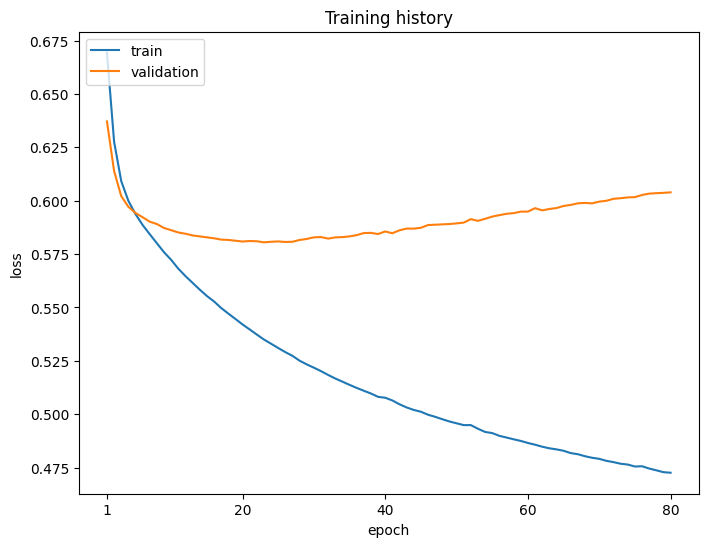

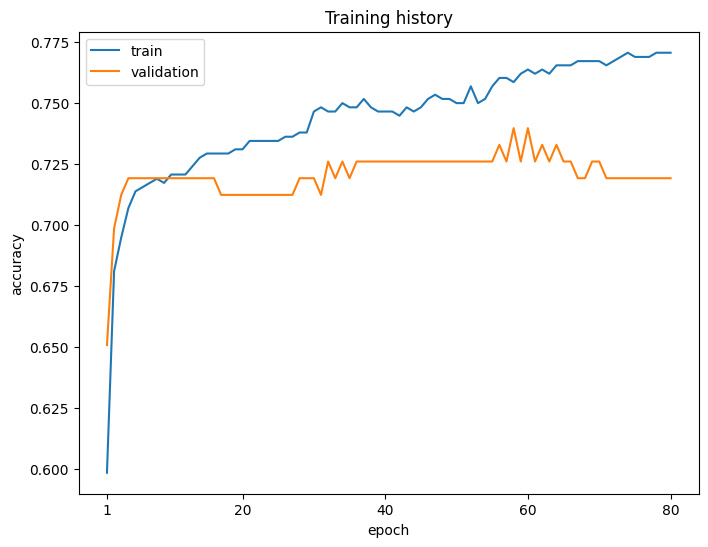

In [7]:
history = model.fit(x=X_train, y=y_train, epochs=80, batch_size=16, validation_split=0.2, verbose=2)
plot_history(history)

### Evaluate Testdata using model

In [8]:
pred = model.predict(X_test)
classes= [1 if i > 0.5  else 0 for i in pred]


10/10 [==============================] - 0s 3ms/step


### Prepare Data for evaluation

In [9]:
result_df = pd.DataFrame(columns=nn_data_raw.columns[:-1])
result_df = result_df.drop(columns="NAME")

for i, row in enumerate(X_test):
    data = [i]
    data.extend(row)
    result_df.loc[len(result_df["INDEX"])] = data

result_df["LABEL"] = y_test
result_df["PRED"] = classes

result_df.to_csv(result_dir / "COX1/baseline_nn.csv", encoding="utf-8")